In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
data = pd.read_csv('input/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
X_train.shape

(784, 41000)

In [30]:
def init_params():
    W1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    W2 = np.random.rand(20, 20) - 0.5
    b2 = np.random.rand(20, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 20))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2,axis = 1,keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1,axis = 1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


W1,b1,W2,b2 = init_params()
W1.shape,b1.shape,W2.shape,b2.shape

((20, 784), (20, 1), (20, 20), (20, 1))

In [31]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [33]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.3, 100)

Iteration:  0
[ 4  4  7 ...  9 11  6] [0 1 0 ... 7 9 9]
0.06382926829268293
Iteration:  10
[0 1 0 ... 7 4 7] [0 1 0 ... 7 9 9]
0.4494390243902439
Iteration:  20
[0 1 0 ... 7 4 7] [0 1 0 ... 7 9 9]
0.6049756097560975
Iteration:  30
[0 1 0 ... 7 4 7] [0 1 0 ... 7 9 9]
0.6489024390243903
Iteration:  40
[0 1 0 ... 7 4 9] [0 1 0 ... 7 9 9]
0.7189756097560975
Iteration:  50
[0 1 0 ... 7 4 9] [0 1 0 ... 7 9 9]
0.7560731707317073
Iteration:  60
[0 1 0 ... 7 4 9] [0 1 0 ... 7 9 9]
0.7834390243902439
Iteration:  70
[0 1 0 ... 7 4 9] [0 1 0 ... 7 9 9]
0.803439024390244
Iteration:  80
[0 1 0 ... 7 4 9] [0 1 0 ... 7 9 9]
0.8185853658536585
Iteration:  90
[0 1 0 ... 7 4 9] [0 1 0 ... 7 9 9]
0.8299268292682926


In [37]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


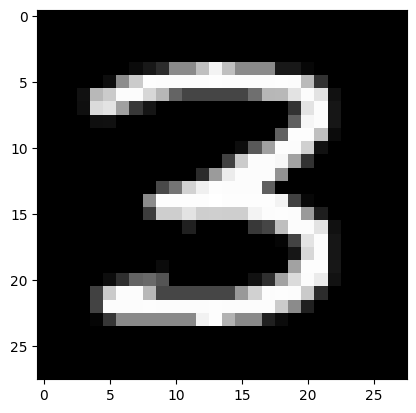

Prediction:  [0]
Label:  0


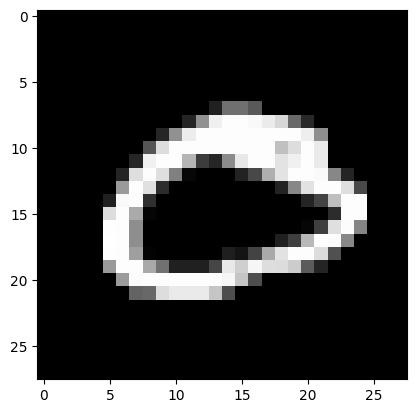

Prediction:  [3]
Label:  3


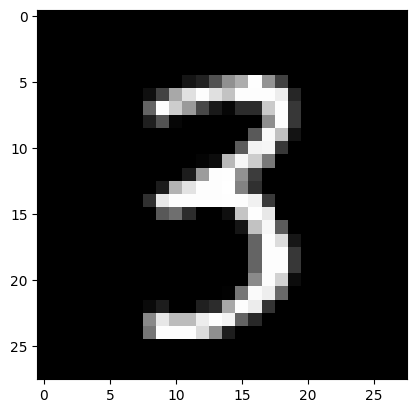

Prediction:  [3]
Label:  3


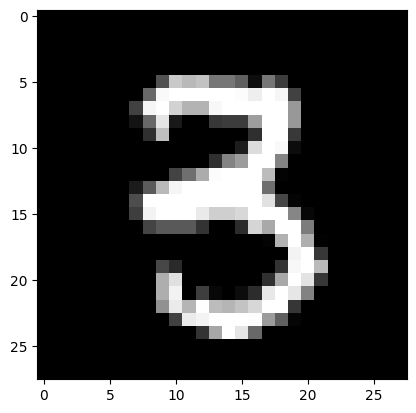

Prediction:  [9]
Label:  4


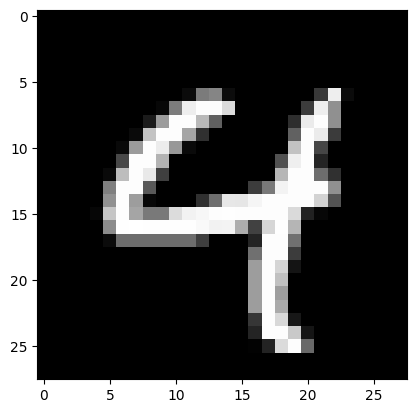

Prediction:  [2]
Label:  2


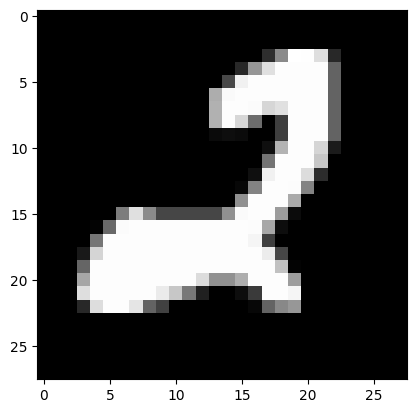

Prediction:  [9]
Label:  9


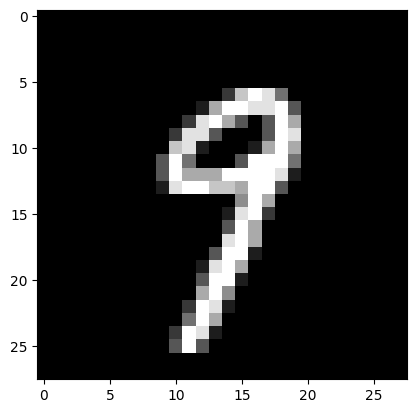

Prediction:  [6]
Label:  6


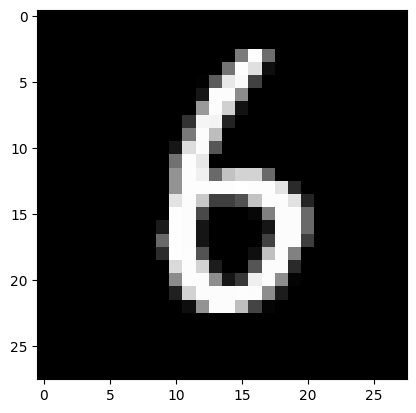

Prediction:  [5]
Label:  5


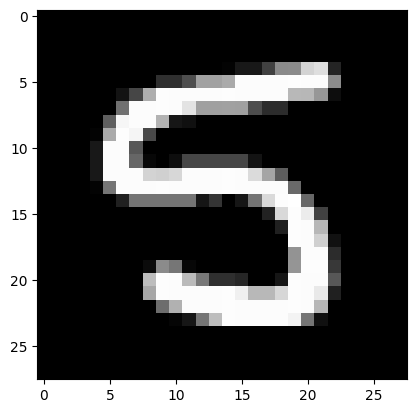

Prediction:  [6]
Label:  6


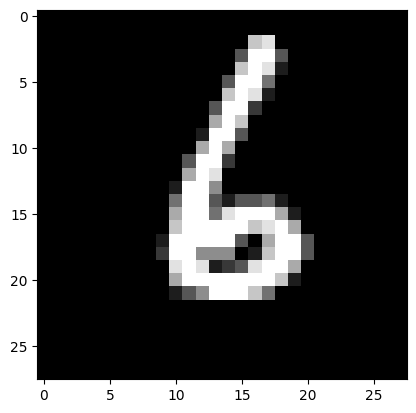

Prediction:  [8]
Label:  8


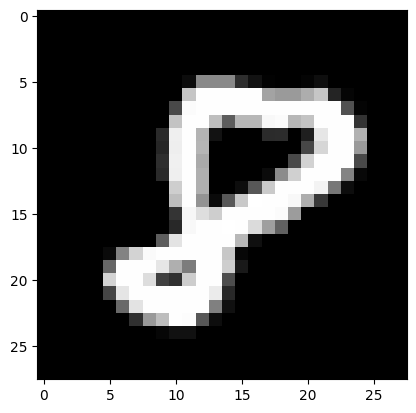

Prediction:  [1]
Label:  1


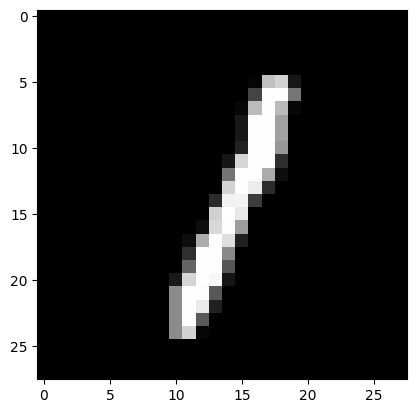

Prediction:  [6]
Label:  6


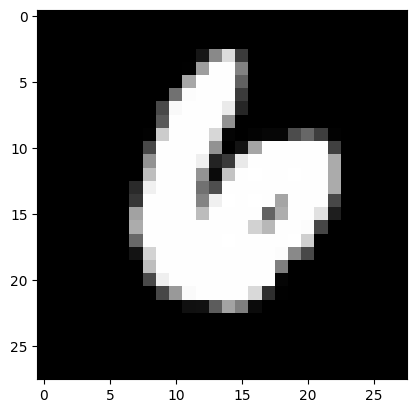

Prediction:  [1]
Label:  1


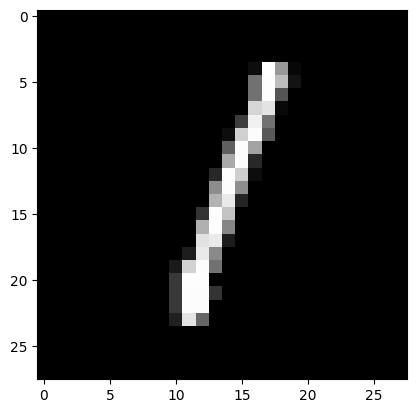

Prediction:  [4]
Label:  4


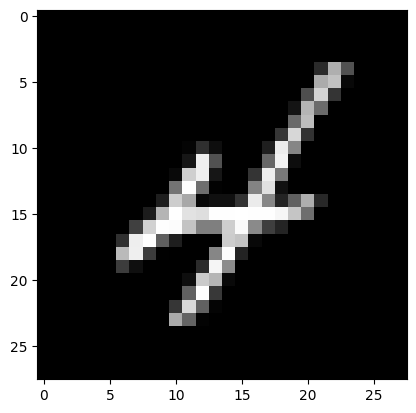

Prediction:  [9]
Label:  4


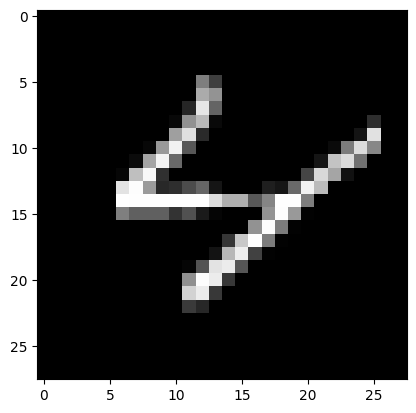

Prediction:  [2]
Label:  2


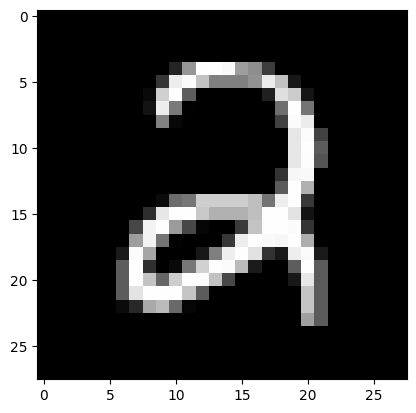

Prediction:  [8]
Label:  8


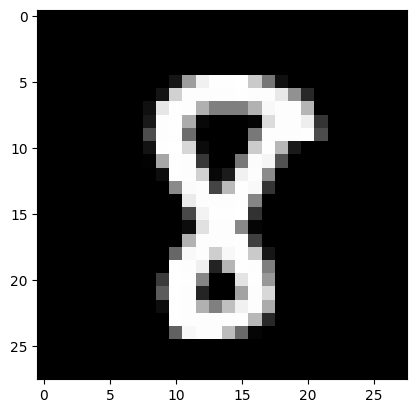

Prediction:  [8]
Label:  8


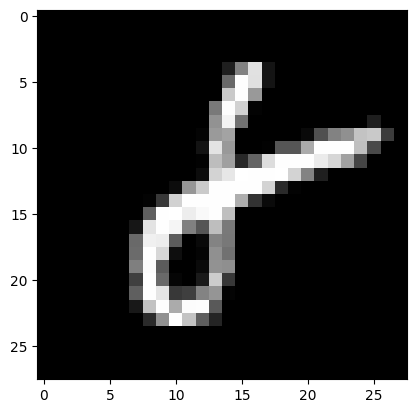

Prediction:  [8]
Label:  8


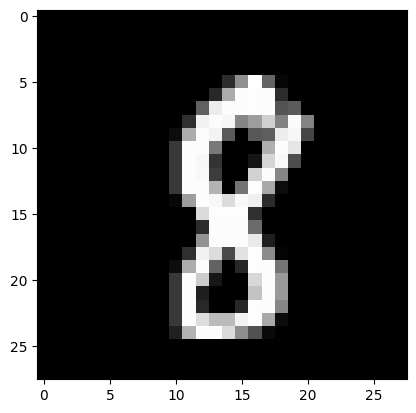

Prediction:  [5]
Label:  5


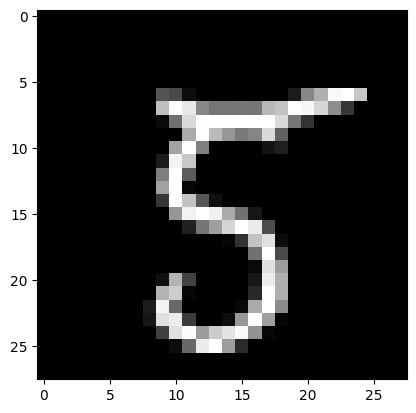

Prediction:  [6]
Label:  6


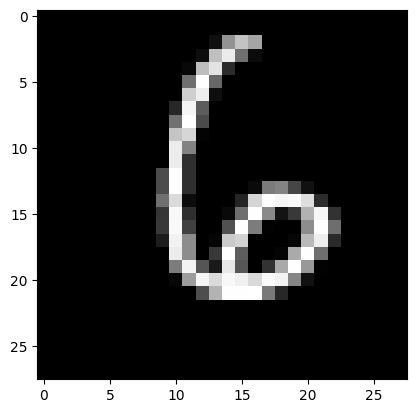

Prediction:  [1]
Label:  1


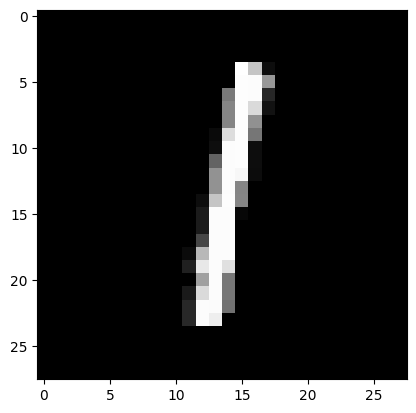

Prediction:  [5]
Label:  5


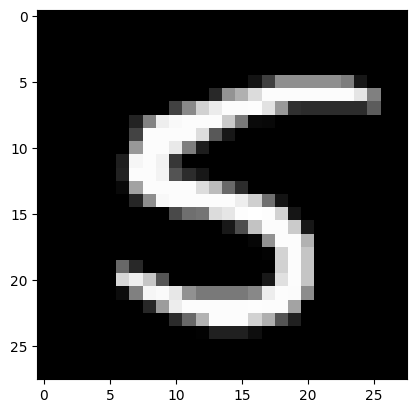

Prediction:  [8]
Label:  2


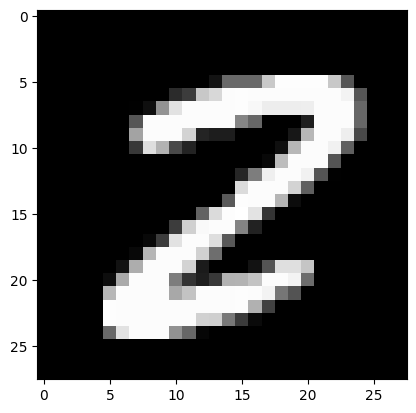

Prediction:  [5]
Label:  5


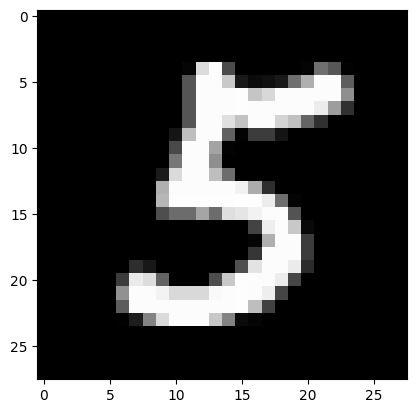

Prediction:  [3]
Label:  3


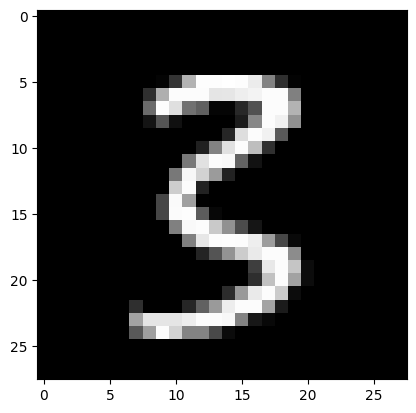

Prediction:  [4]
Label:  4


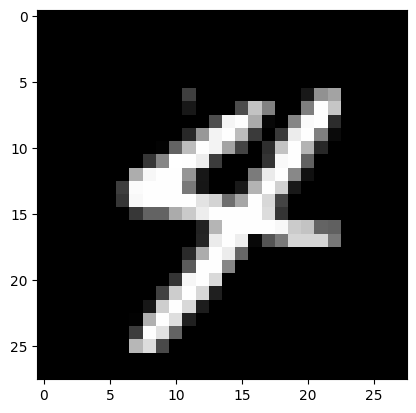

Prediction:  [7]
Label:  7


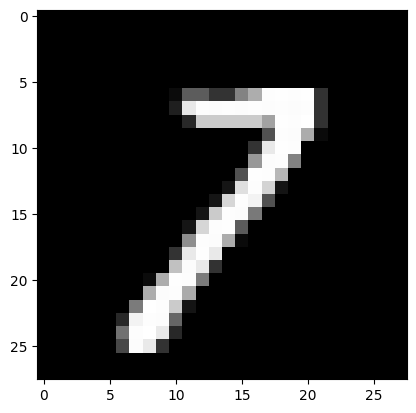

Prediction:  [1]
Label:  7


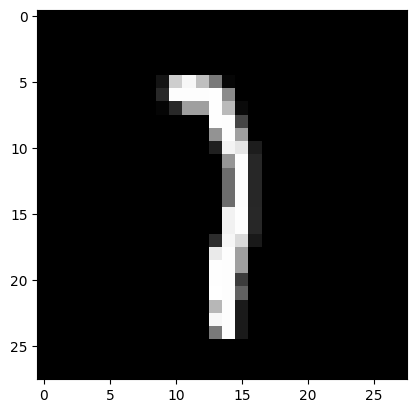

Prediction:  [2]
Label:  3


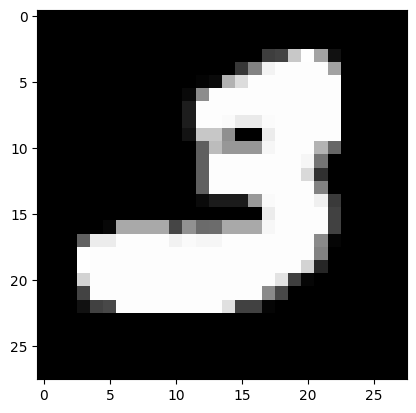

Prediction:  [7]
Label:  7


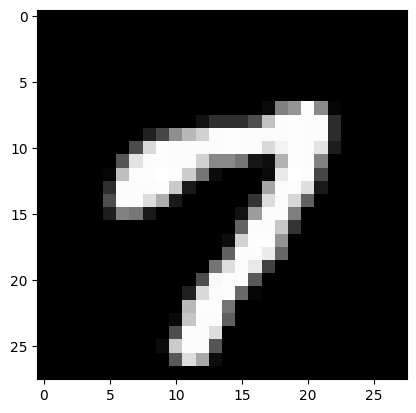

Prediction:  [3]
Label:  3


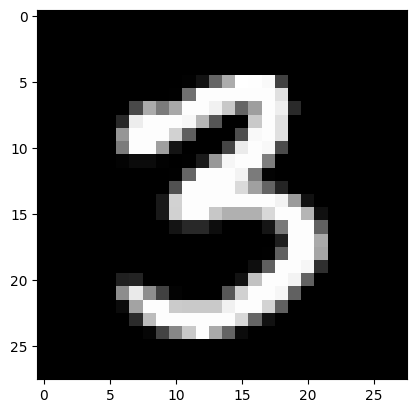

Prediction:  [1]
Label:  1


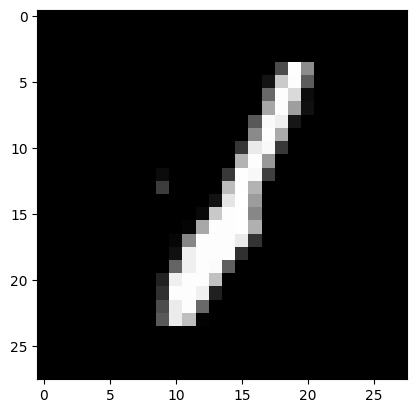

Prediction:  [5]
Label:  5


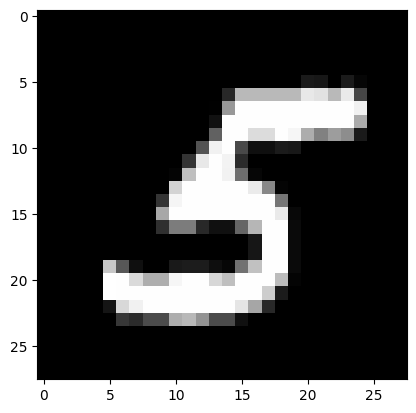

Prediction:  [3]
Label:  3


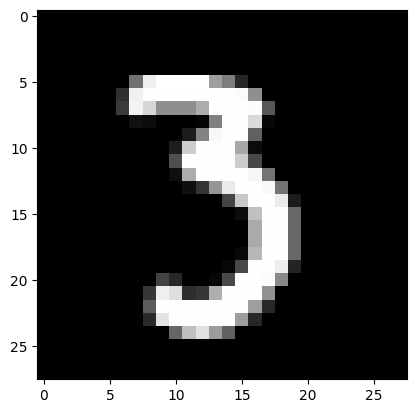

Prediction:  [9]
Label:  9


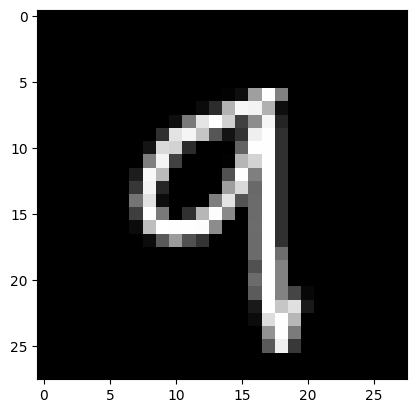

Prediction:  [3]
Label:  3


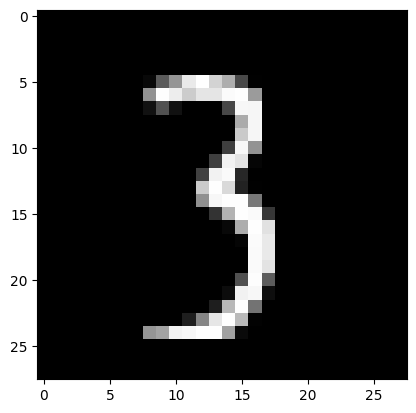

Prediction:  [0]
Label:  0


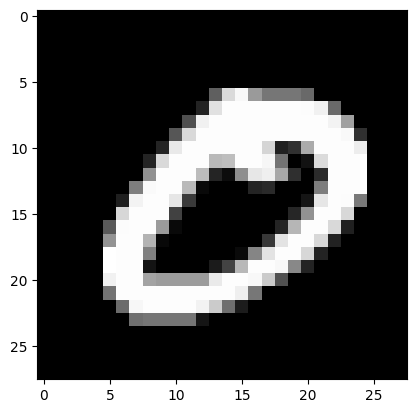

Prediction:  [7]
Label:  7


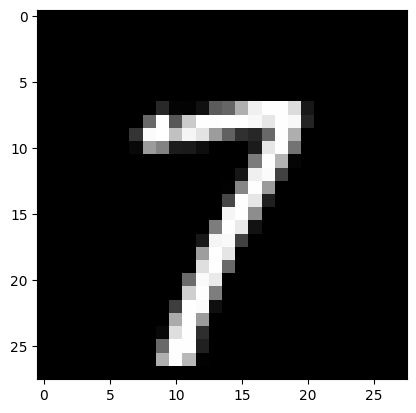

Prediction:  [4]
Label:  4


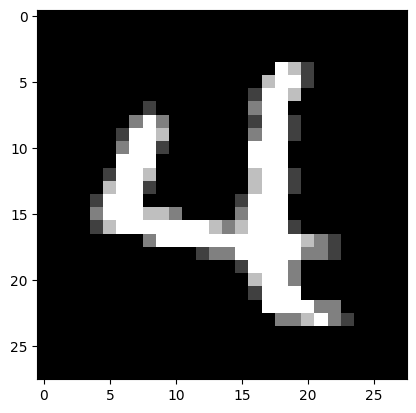

Prediction:  [2]
Label:  2


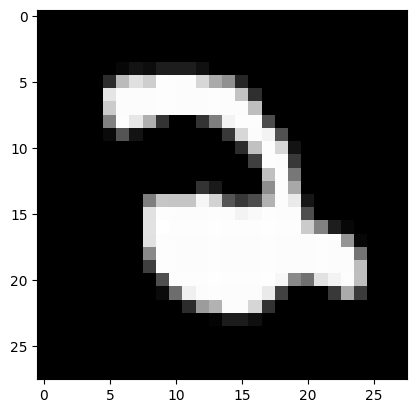

Prediction:  [1]
Label:  1


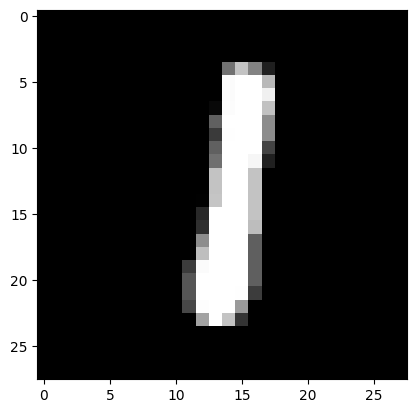

Prediction:  [2]
Label:  2


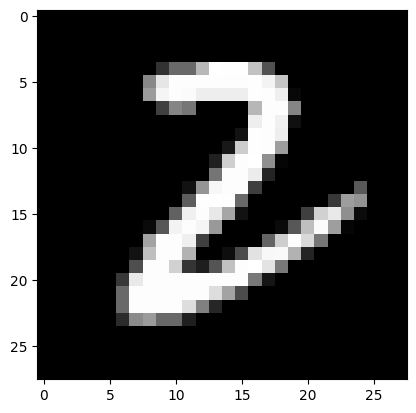

Prediction:  [5]
Label:  5


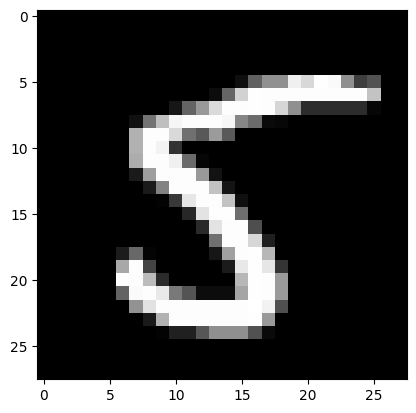

Prediction:  [2]
Label:  7


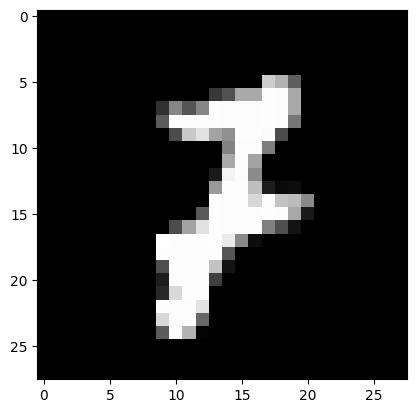

Prediction:  [8]
Label:  5


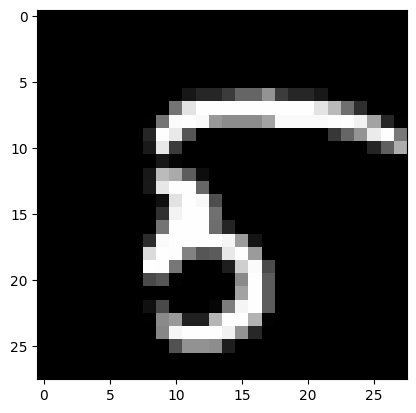

Prediction:  [5]
Label:  5


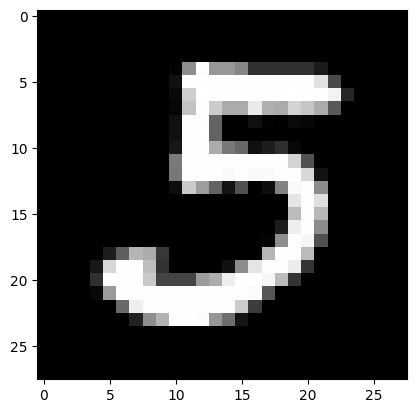

Prediction:  [8]
Label:  8


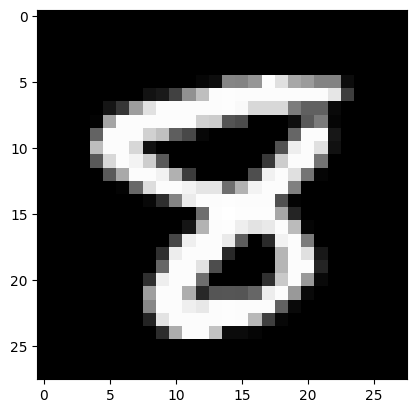

Prediction:  [0]
Label:  0


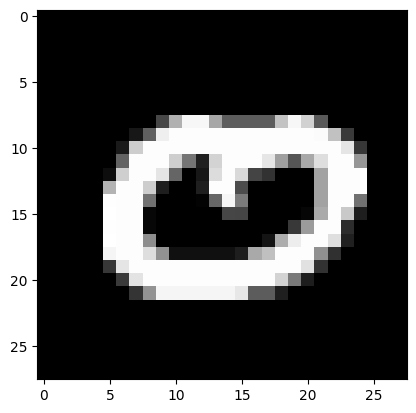

Prediction:  [6]
Label:  6


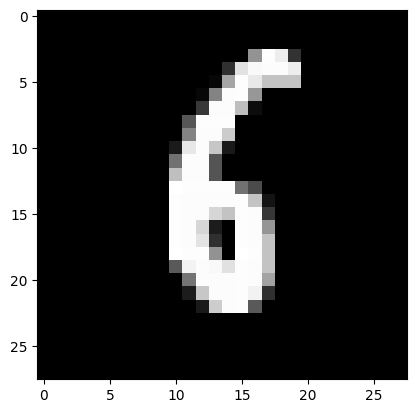

Prediction:  [0]
Label:  0


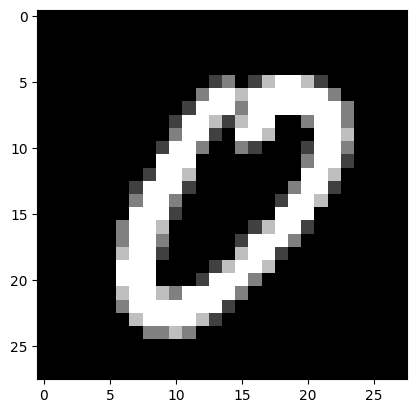

Prediction:  [9]
Label:  9


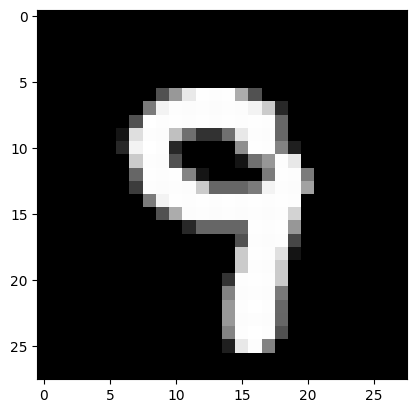

Prediction:  [4]
Label:  4


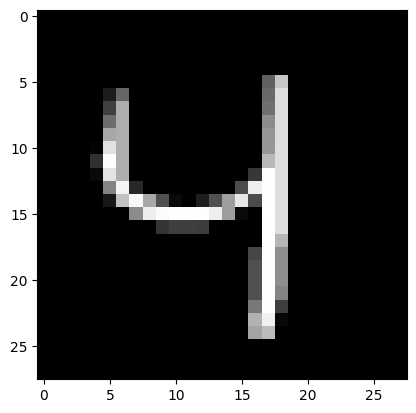

Prediction:  [3]
Label:  3


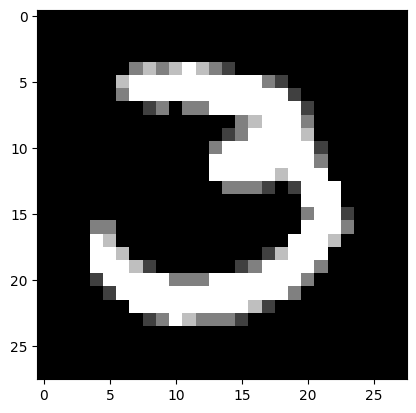

Prediction:  [0]
Label:  0


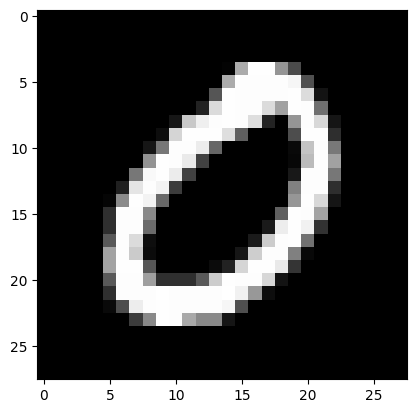

Prediction:  [5]
Label:  8


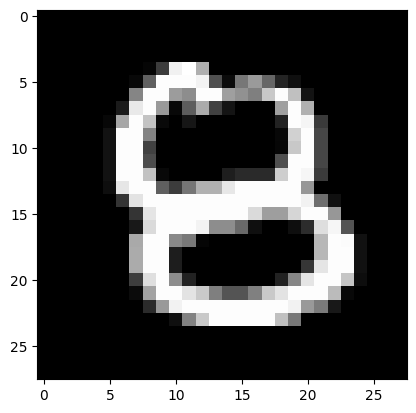

Prediction:  [0]
Label:  0


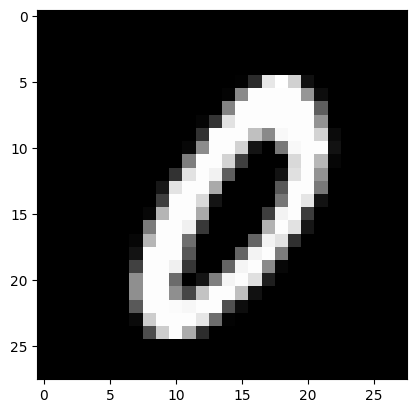

Prediction:  [6]
Label:  6


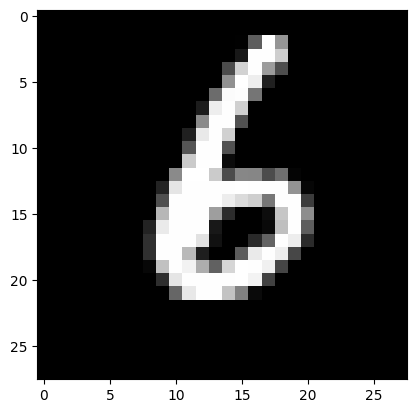

Prediction:  [3]
Label:  3


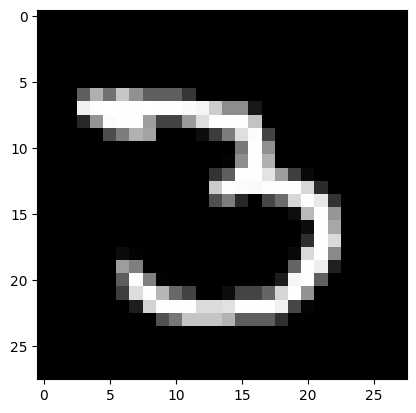

Prediction:  [6]
Label:  6


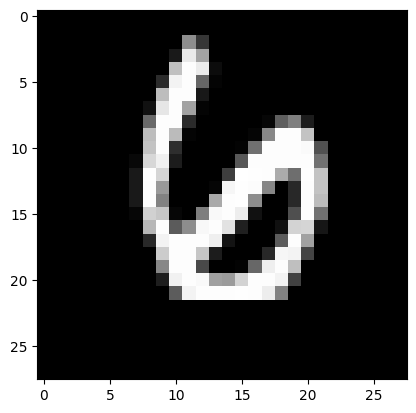

Prediction:  [7]
Label:  7


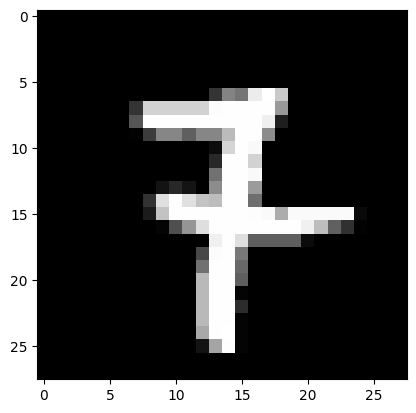

Prediction:  [7]
Label:  9


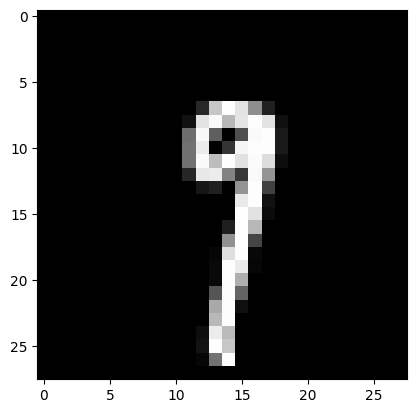

Prediction:  [8]
Label:  8


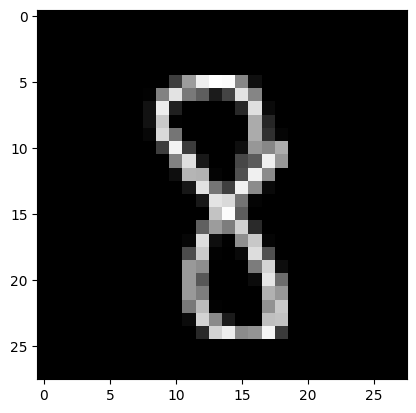

Prediction:  [0]
Label:  0


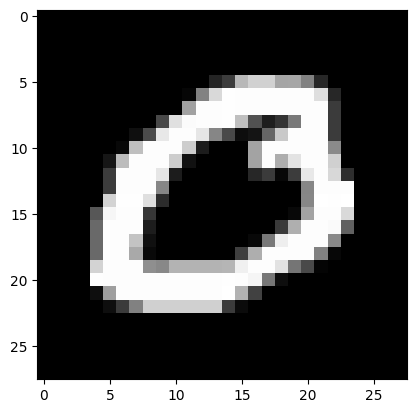

Prediction:  [5]
Label:  5


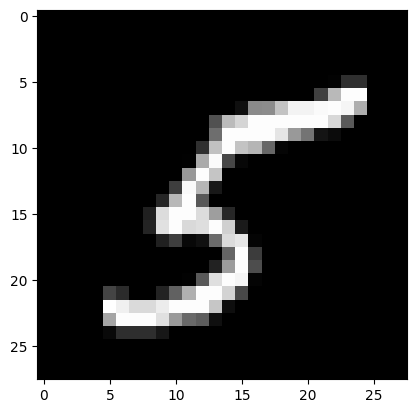

Prediction:  [5]
Label:  5


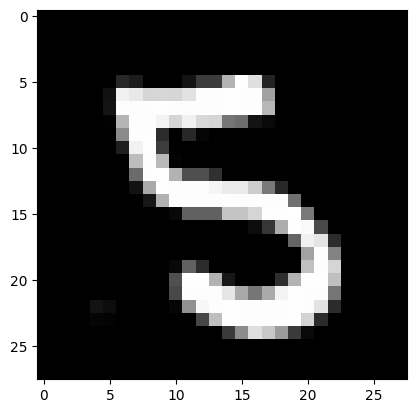

Prediction:  [9]
Label:  9


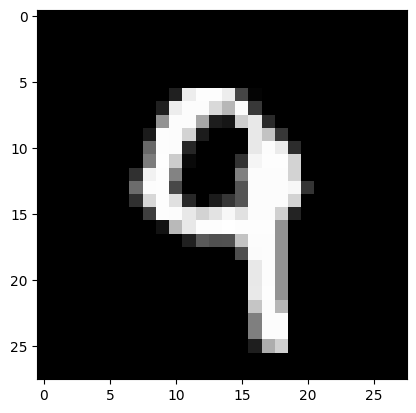

Prediction:  [9]
Label:  9


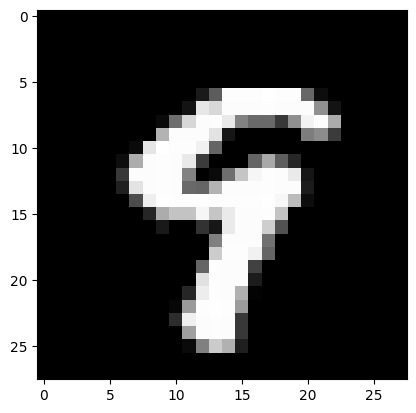

Prediction:  [8]
Label:  8


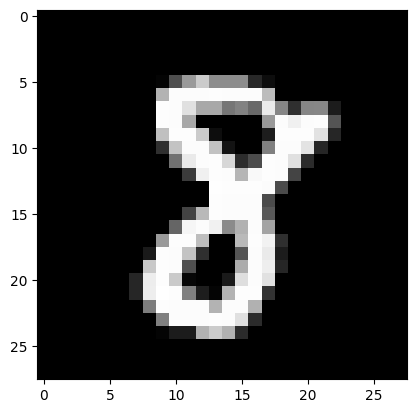

Prediction:  [3]
Label:  3


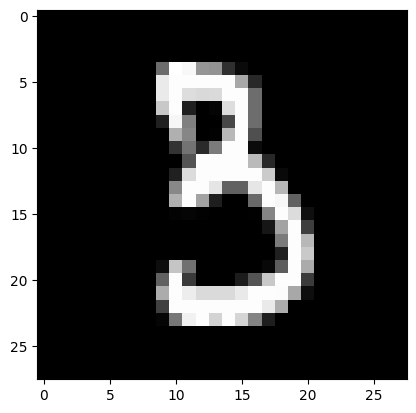

Prediction:  [8]
Label:  8


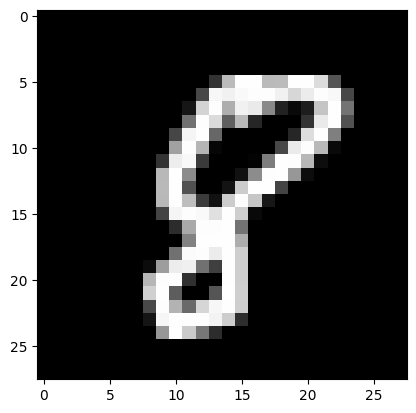

Prediction:  [3]
Label:  3


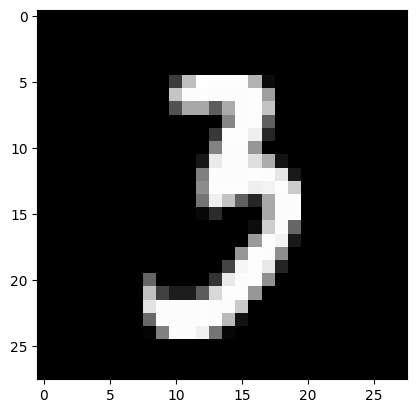

Prediction:  [1]
Label:  1


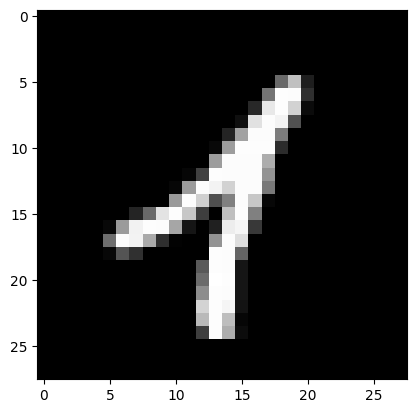

Prediction:  [3]
Label:  5


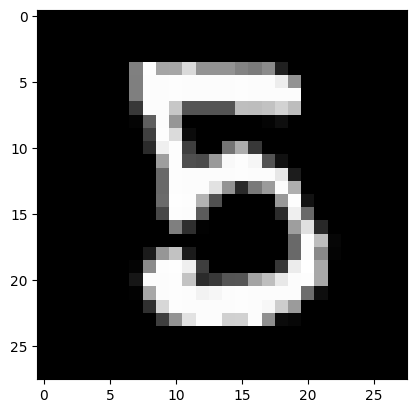

Prediction:  [5]
Label:  7


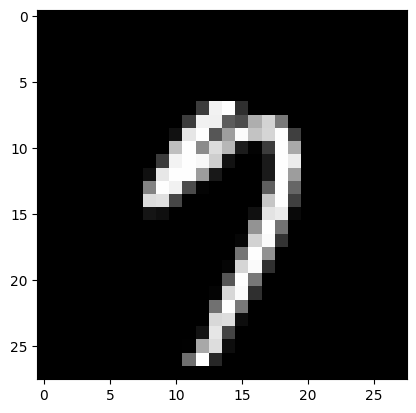

Prediction:  [9]
Label:  9


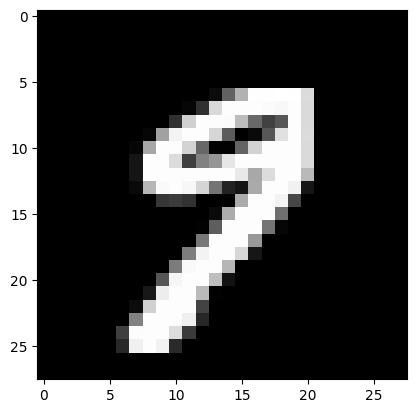

Prediction:  [4]
Label:  4


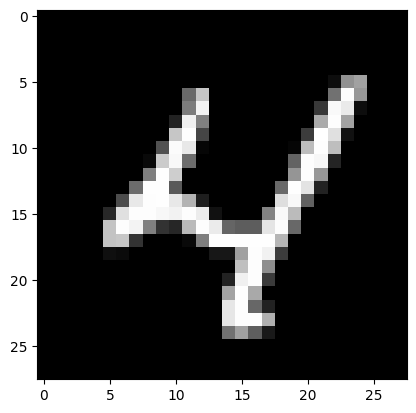

Prediction:  [0]
Label:  0


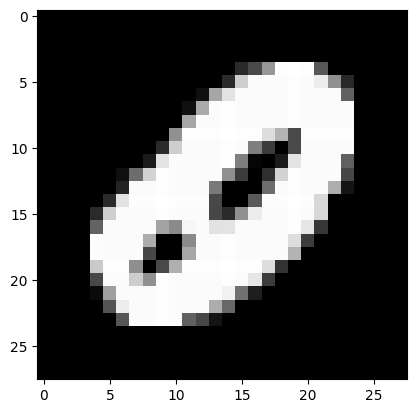

Prediction:  [8]
Label:  8


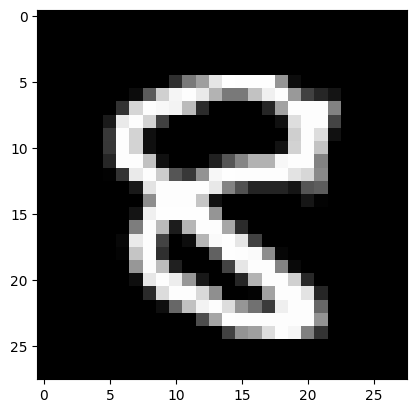

Prediction:  [2]
Label:  2


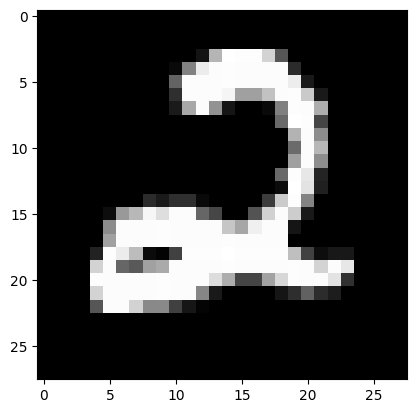

Prediction:  [2]
Label:  2


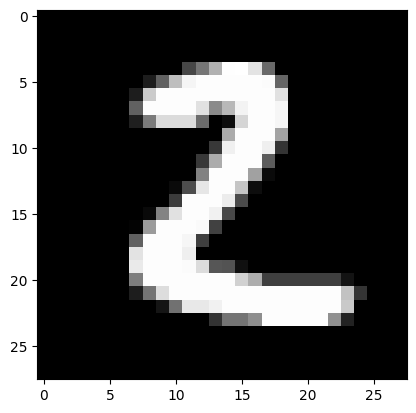

Prediction:  [9]
Label:  9


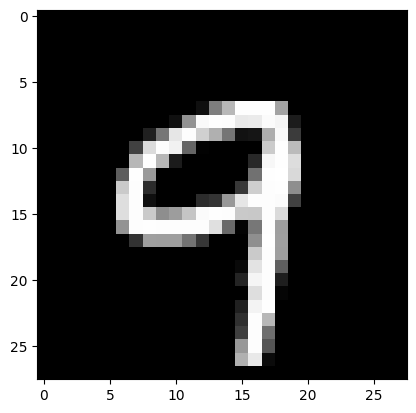

Prediction:  [4]
Label:  4


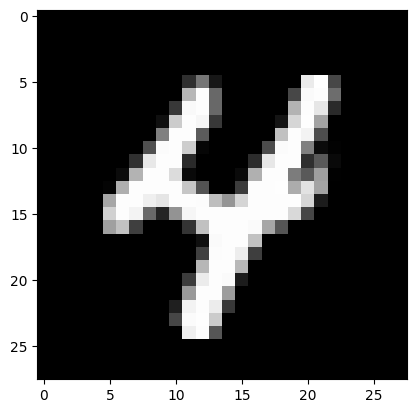

Prediction:  [3]
Label:  3


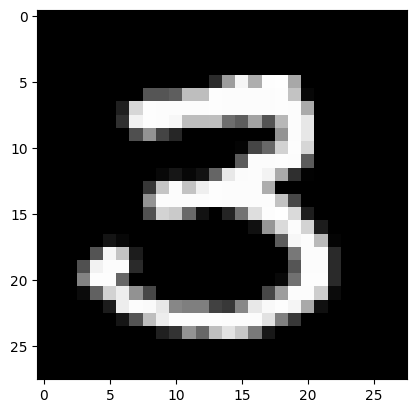

Prediction:  [9]
Label:  4


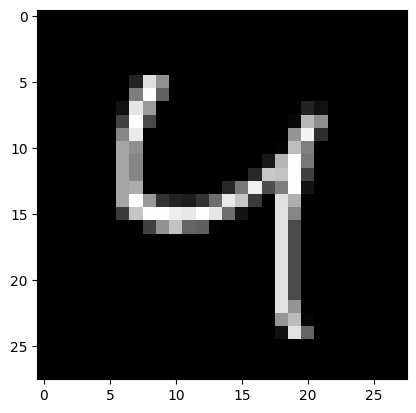

Prediction:  [9]
Label:  9


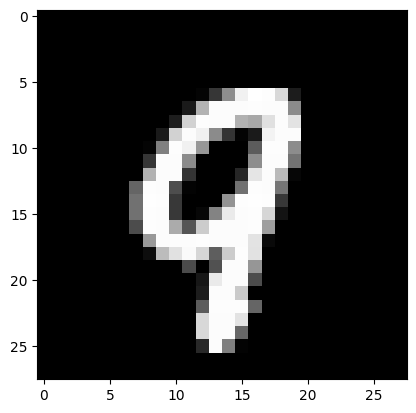

Prediction:  [3]
Label:  8


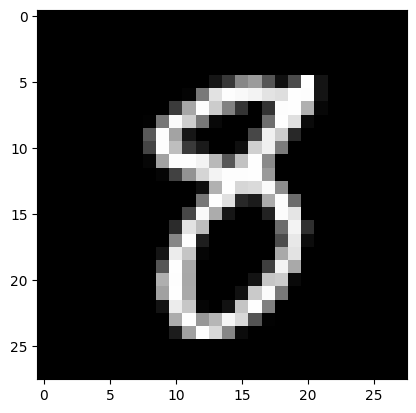

Prediction:  [1]
Label:  1


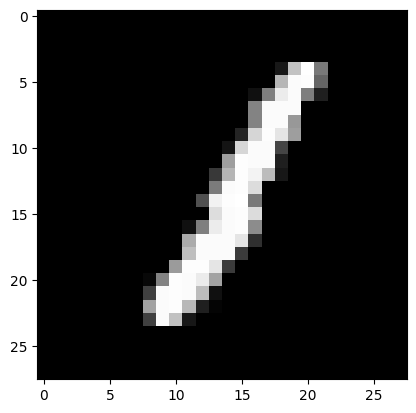

Prediction:  [7]
Label:  7


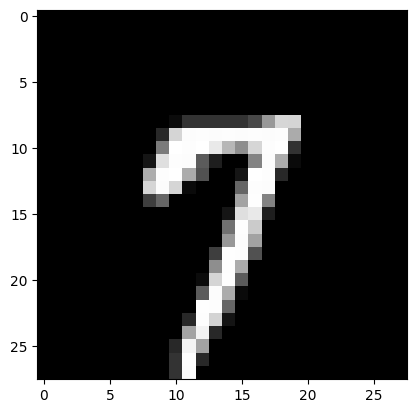

Prediction:  [0]
Label:  5


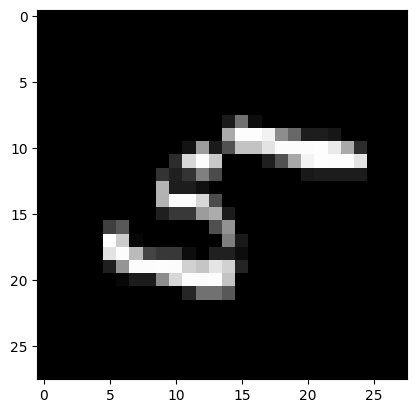

Prediction:  [8]
Label:  8


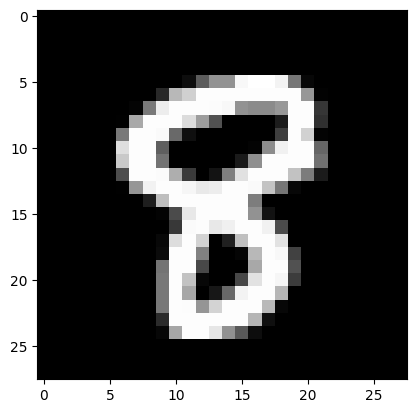

Prediction:  [5]
Label:  5


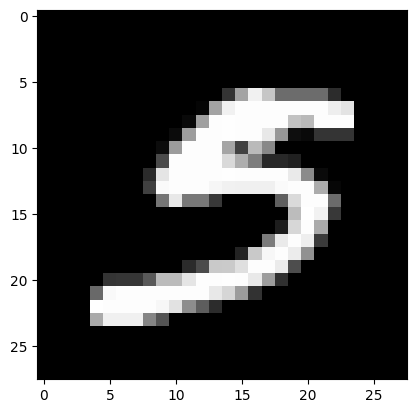

Prediction:  [3]
Label:  3


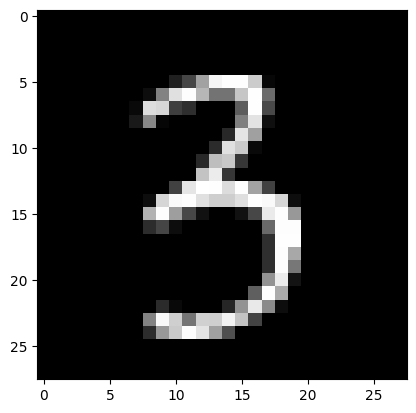

Prediction:  [7]
Label:  7


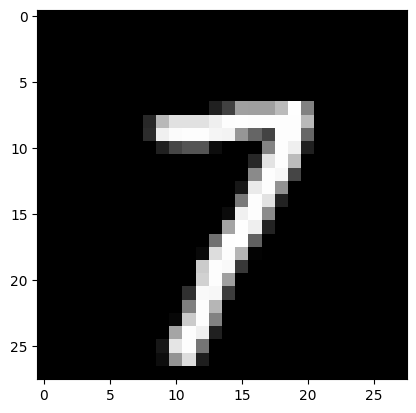

Prediction:  [6]
Label:  6


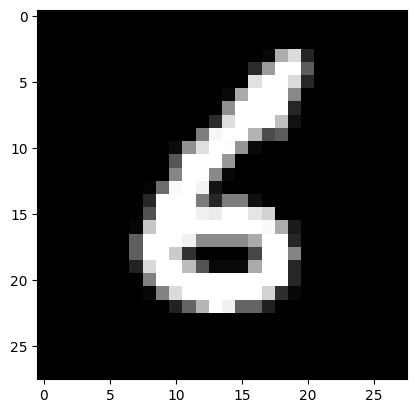

Prediction:  [9]
Label:  7


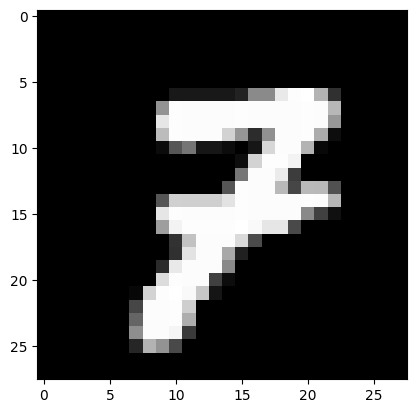

Prediction:  [3]
Label:  3


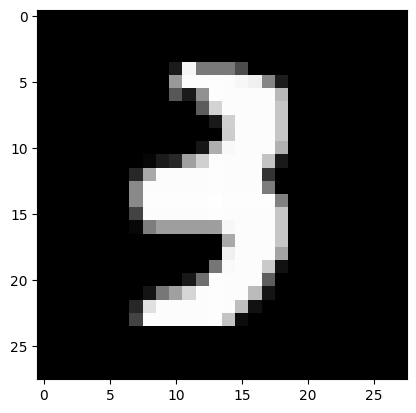

Prediction:  [0]
Label:  0


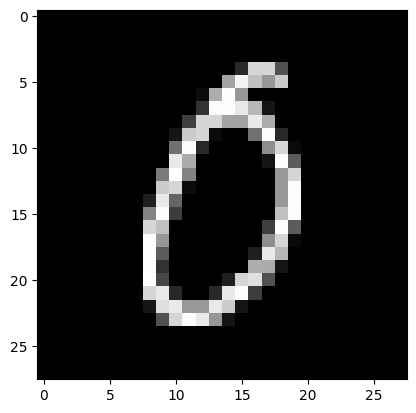

Prediction:  [8]
Label:  6


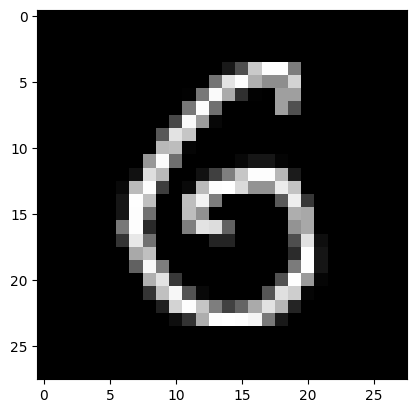

In [39]:
for i in range(100,200):
    test_prediction(i, W1, b1, W2, b2)